# Project: Movie data analysis
IMDB1.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

In [60]:
import sqlite3
import pandas as pd
import numpy as np

In [221]:
database=sqlite3.connect('IMDB.sqlite')
IMDB=pd.read_sql_query('select * from IMDB',database)
IMDB.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,2e+07,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,1.8e+07,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8e+06,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,1.2e+07,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8.9e+06,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [4]:
genre=pd.read_sql_query('select * from genre',database)
genre.head()

,Movie_id,genre
0,36809,Biography
1,30114,Adventure
2,37367,Comedy
3,49473,Comedy
4,14867,Drama


In [6]:
earning=pd.read_sql_query('select * from earning',database)
earning.head()

,Movie_id,Domestic,Worldwide
0,36809,56671993,187733202.0
1,30114,18335230,60738797.0
2,37367,35014192,39187783.0
3,49473,15322921,87100449.0
4,14867,6739492,19839492.0


**1.IMDB Voted**:

the most voted movie in IMDB Movie Database.

In [18]:
most_vote=pd.read_sql_query("select Title, Rating,TotalVotes from IMDB order by TotalVotes desc",database)
print(most_vote['Title'][0],most_vote['Rating'][0])

Inception (2010) 8.8


**2.IMDB running time:**

the Movie with Longest-Running Time from IMDB Movie database.

In [114]:
Longest_runtime=pd.read_sql_query("select Title, Runtime from IMDB order by Runtime",database)
Longest_runtime=Longest_runtime[21:]

runtime=Longest_runtime['Runtime'].str.split()
time=[]
for i in runtime:
    time.append(int(i[0]))


time=np.array(time)
index=np.argmax(time)

Longest_runtime=np.array(Longest_runtime)
print(Longest_runtime[index][0],time[index])

The Wolf of Wall Street (2013) 180


**3.IMDB profit**:

 the movie which has maximum net profit in IMDB Movie Database.
 
 Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [231]:
data=pd.read_sql_query("select Title,Domestic,Worldwide,Budget from IMDB inner join earning on IMDB.Movie_id=earning.Movie_id",
                                     database)
Budget=data['Budget']
Budget[Budget=='']=np.nan

data=data.dropna()
data['Budget'] = pd.to_numeric(data['Budget'])
data['net_profit']=data['Domestic']+data['Worldwide']-data['Budget']

net_profit=data['net_profit']
net_profit=np.array(net_profit)

index=np.argmax(net_profit)

data=np.array(data)

print(data[index][0])

Star Wars: The Force Awakens (2015)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**4.IMDB least budget**
the least budgeted movie in IMDB Movie Database.(If there is more than one least budgeted movies then print the movie which has maximum net profit.)

In [241]:
data=pd.read_sql_query("select Title,Domestic,Worldwide,Budget from IMDB inner join earning on IMDB.Movie_id=earning.Movie_id",
                                     database)
Budget=data['Budget']
Budget[Budget=='']=np.nan

data=data.dropna()
data['Budget'] = pd.to_numeric(data['Budget'])

data['net_profit']=data['Domestic']+data['Worldwide']-data['Budget']
data.to_sql("profit1",database)
data1=pd.read_sql_query("select Title,Budget,net_profit from profit1 order by Budget asc,net_profit desc",
                                     database)

data1=np.array(data1)
print(data1[0][0])

Short Term 12 (2013)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**5.IMDB Year Top**

the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.

In [311]:
data=pd.read_sql_query("select Title,Domestic,Worldwide from IMDB inner join earning on IMDB.Movie_id=earning.Movie_id",
                                     database)

data['grossing']=data['Domestic']+data['Worldwide']

a=data['Title'].str.split()
year=[]
for i in data['Title']:
    year.append(i[-5:-1])
data['year']=year
data.to_sql('grossingyear1',database)
data=pd.read_sql_query('select year,grossing,Title from grossingyear1 order by year asc, grossing desc',database)
data=np.array(data)

time=[]
for i in data:
    time.append(int(i[0]))

time=np.array(time)

index=[]

index1=np.where(time==2010)
for i in index1:
    index.append(i[0])

index2=np.where(time==2011)
for i in index2:
    index.append(i[0])
    
index3=np.where(time==2012)
for i in index3:
    index.append(i[0])

index4=np.where(time==2013)
for i in index4:
    index.append(i[0])
    
index5=np.where(time==2014)
for i in index5:
    index.append(i[0])
    
index6=np.where(time==2015)
for i in index6:
    index.append(i[0])
    
index7=np.where(time==2016)
for i in index7:
    index.append(i[0])

for i in index:
    print(data[i][0],data[i][2])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


**6.IMDB genre budget**

the percentage of the budget for each genre in IMDB Movie Dataset.Plot the pie chart.

In [316]:
data=pd.read_sql_query("select genre,Budget from IMDB inner join genre on IMDB.Movie_id=genre.Movie_id",
                                     database)
Budget=data['Budget']
Budget[Budget=='']='0.0'

genre=data['genre']
genre[genre=='']=np.nan

data=data.dropna()
data['Budget'] = pd.to_numeric(data['Budget'])


data.to_sql('genrebudget',database)

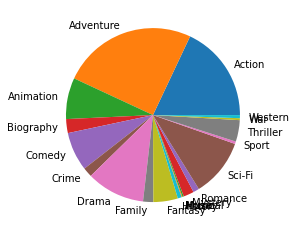

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


In [340]:
data=pd.read_sql_query("select genre,sum(Budget) as budget from genrebudget group by genre",database )

import matplotlib.pyplot as plt
budget=data['budget']
budget=np.array(budget)
genre=data['genre']
genre=np.array(genre)
plt.pie(budget,labels=genre)
plt.show()


totalbudget=data['budget'].sum()
data['percentage']=data['budget']/totalbudget
data=np.array(data)
for i in data:
    print(i[0],format(i[2]*100,'.2f'))

**7.IMDB genre earning**
 the percentage of the total earning for each genre in IMDB Movie Dataset.Plot the pie chart.

In [345]:
data=pd.read_sql_query("select genre,Domestic,Worldwide from genre inner join earning on genre.Movie_id=earning.Movie_id",
                                     database)

data['earning']=data['Domestic']+data['Worldwide']
data.to_sql('genreearning1',database)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


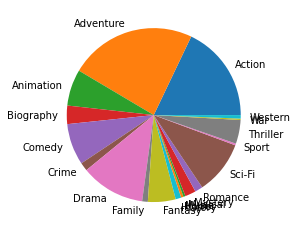

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


In [352]:
data=pd.read_sql_query("select genre,sum(earning) as earning from genreearning1 group by genre",database )

genre=data['genre']
genre[genre=='']=np.nan
data=data.dropna()

import matplotlib.pyplot as plt
earning=data['earning']
earning=np.array(earning)
genre=data['genre']
genre=np.array(genre)
plt.pie(earning,labels=genre)
plt.show()


totalearning=data['earning'].sum()
data['percentage']=data['earning']/totalearning
data=np.array(data)

for i in data:
    print(i[0],format(i[2]*100,'.2f'))

**8.IMDB Specific Genre**

the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.

In [378]:
data=pd.read_sql_query("select Title,genre,Rating from IMDB inner join genre on genre.Movie_id=IMDB.Movie_id",
                                     database)
genre=data['genre']
genre[genre=='']=np.nan
data=data.dropna()
data=data[data['Rating']>=8]

key=data['Title']
key=np.array(key)
value=data['genre']
value=np.array(value)

Dict={}
for i in range(len(key)):
    if key[i] in Dict:
        Dict[key[i]]+=value[i]
    else:
        Dict[key[i]]=value[i]
for i in Dict:
    if 'Sci-Fi' in Dict[i] and 'Mystery' in Dict[i]:
        print(i)

Arrival (2016)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
